In [1]:
import pandas as pd

trip_data_file = "data/trip_data_4.csv"
trip_fare_file = "data/trip_fare_4.csv"

trips = pd.read_csv(trip_data_file, nrows=10000)
fares = pd.read_csv(trip_fare_file, nrows=10000)

In [2]:
#Merge the Trip and Fare data together
full_tripdata = pd.merge(left=trips,right=fares, how='left', left_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'], right_on=['medallion',' hack_license',' vendor_id',' pickup_datetime'])
full_tripdata = full_tripdata.drop_duplicates()
full_tripdata = full_tripdata.loc[(full_tripdata[' pickup_longitude'] != 0) & (full_tripdata[' pickup_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0) & (full_tripdata[' dropoff_latitude'] != 0)]

In [3]:
# joing the pick up and drop off coordinate together
pickupLoc = pd.DataFrame(full_tripdata.iloc[:,10:12])
pickupLoc = pickupLoc.rename(columns={' pickup_longitude':'longtitude', ' pickup_latitude':'latitude'})
dropoffLoc = pd.DataFrame(full_tripdata.iloc[:,12:14])
dropoffLoc = pickupLoc.rename(columns={' dropoff_longitude':'longtitude', ' dropoff_latitude':'latitude'})

loc = pd.concat([pickupLoc,dropoffLoc],axis=0)

In [4]:
loc.count()

longtitude    19704
latitude      19704
dtype: int64

In [5]:
#try to use K-mean to cluster the locations together 

locations = loc.copy()

locations = locations.drop_duplicates()

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

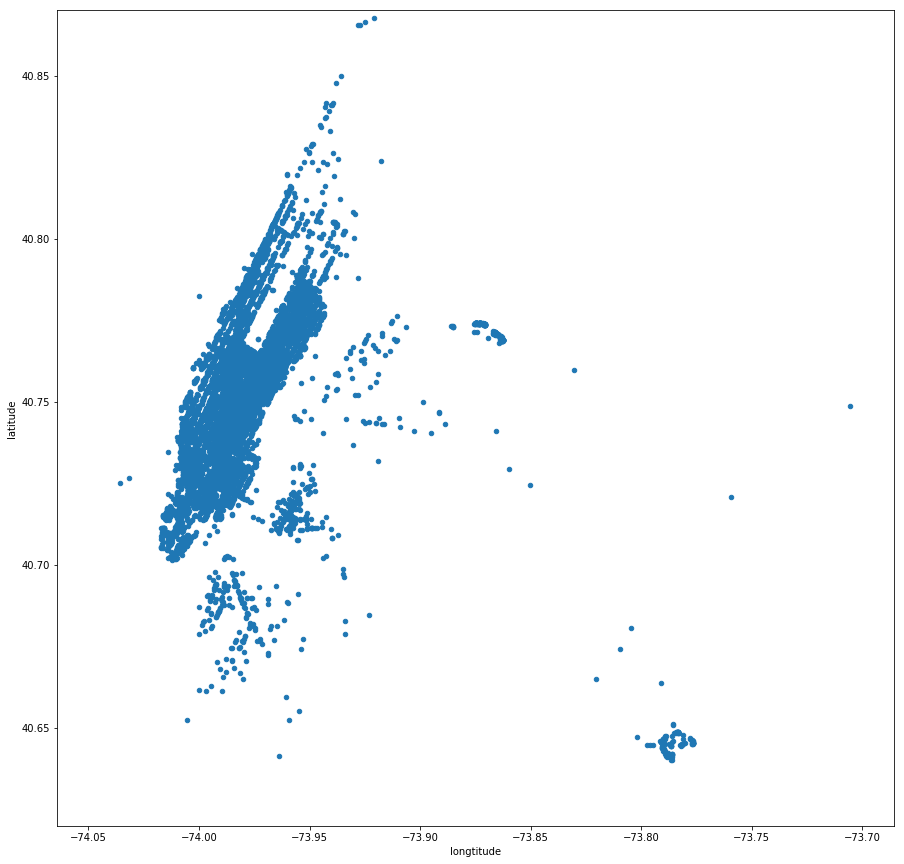

In [7]:
#locations.describe()
#locations.sort_values(by=['latitude'])
#plot the chart with raw coordinates
locations.plot.scatter(x="longtitude",y="latitude",figsize=(15,15),ylim=(40.62,40.87))

In [8]:
#Training with K-mean
from sklearn.cluster import KMeans

training = locations.as_matrix()

kmeans = KMeans(n_clusters=50).fit(training)

9818


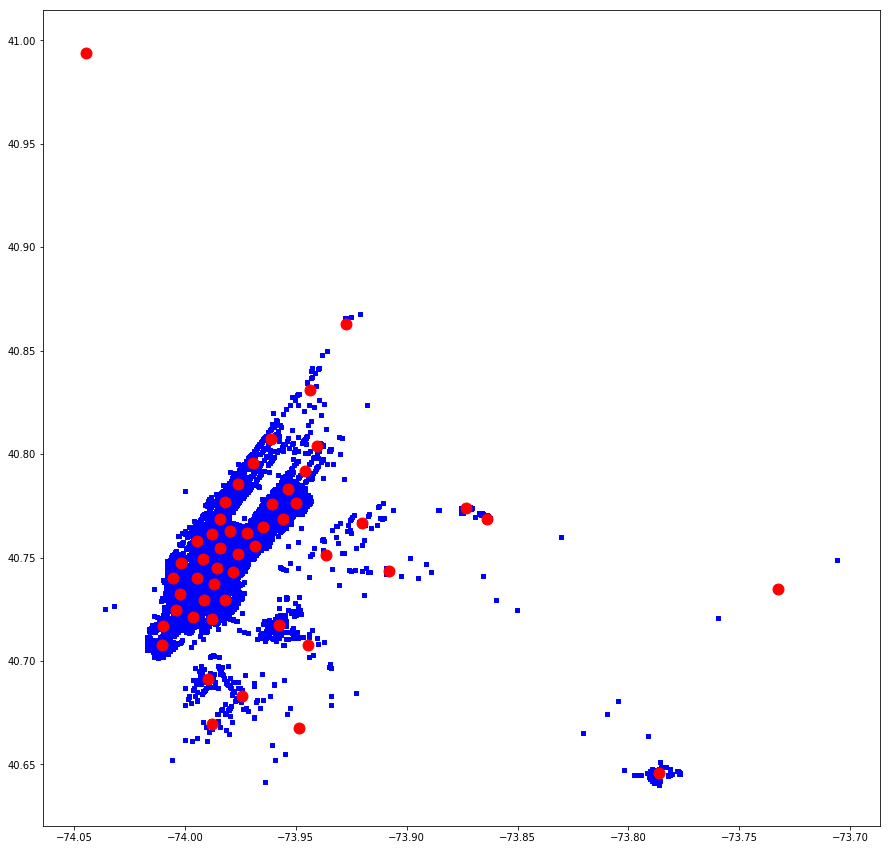

In [9]:
# Visulase the Trip locations and cluster center together, to validate the trainin result

cluster_centers = kmeans.cluster_centers_
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(111)
print len(training[:,0])
ax1.scatter(training[:,0], training[:,1], s=10, c='b', marker="s", label='loc')
ax1.scatter(cluster_centers[:,0],cluster_centers[:,1], s=120, c='r', marker="o", label='center')
#plt.legend(loc='upper left');
plt.show()

In [ ]:
#Save the trained model to disk
import pickle
pickle.dump(kmeans,open("location_cluster_kmean","wb"))

In [ ]:
#using DBSCAN clustering is the idea I found online when I discovered K-mean isn't the best apporach for geo-spatial clustering 
#algorithm 
# Reference URL http://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/


from sklearn.cluster import DBSCAN
import numpy as np

#kms_per_radian = 6371.0088
#epsilon = 1.5 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(training))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([training[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))